# Data Exploration

In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [5]:
df = pd.read_csv('data_features_all.csv',index_col=0)

In [3]:
df_num = df.select_dtypes(include=np.number)
X = df_num.drop('ACTIVE',axis=1)
y = df_num['ACTIVE']

In [6]:
X

,fragm_fr_Al_COO,fragm_fr_Al_OH,fragm_fr_Al_OH_noTert,fragm_fr_ArN,fragm_fr_Ar_COO,fragm_fr_Ar_N,fragm_fr_Ar_NH,fragm_fr_Ar_OH,fragm_fr_COO,fragm_fr_COO2,...,rdMol_CalcNumRings,rdMol_CalcNumRotatableBonds,rdMol_CalcNumSaturatedCarbocycles,rdMol_CalcNumSaturatedHeterocycles,rdMol_CalcNumSaturatedRings,rdMol_CalcNumSpiroAtoms,rdMol_CalcNumUnspecifiedAtomStereoCenters,rdMol_CalcPhi,rdMol_CalcTPSA,rdMol__CalcMolWt
INDEX,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,2,5,0,0,0,0,0,5.522679,50.36,338.451
2,0,0,0,0,0,0,0,1,0,0,...,2,8,0,0,0,0,1,7.052794,40.54,339.479
3,0,0,0,0,0,0,0,0,0,0,...,2,3,0,1,1,0,1,3.718405,70.23,233.271
4,0,0,0,0,0,5,0,0,0,0,...,3,3,0,0,0,0,0,3.973286,74.31,353.304
5,0,0,0,0,0,2,0,0,0,0,...,4,4,0,0,0,0,0,3.700854,69.29,333.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148561,0,0,0,0,0,0,0,0,0,0,...,1,8,0,0,0,0,0,9.286764,71.00,491.224
148562,0,0,0,0,0,0,0,0,0,0,...,2,5,0,0,0,0,0,4.883365,53.99,302.326
148563,0,0,0,0,0,0,0,0,0,0,...,3,3,0,0,0,0,0,3.784625,84.66,349.389


## Heatmap

In [10]:
features = base_imp[:20]['feature'].to_list()
features.append('ACTIVE')

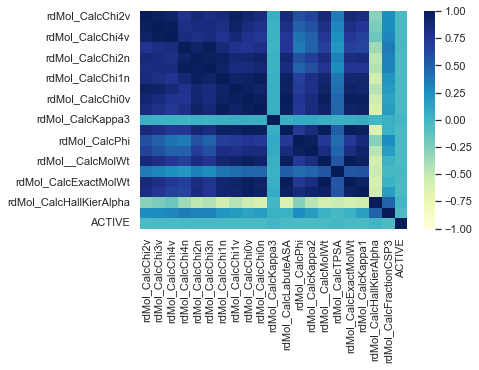

In [11]:
#Correlation
sns.heatmap(df[features].corr(),vmin=-1, vmax=1,cmap="YlGnBu");

## Distributions

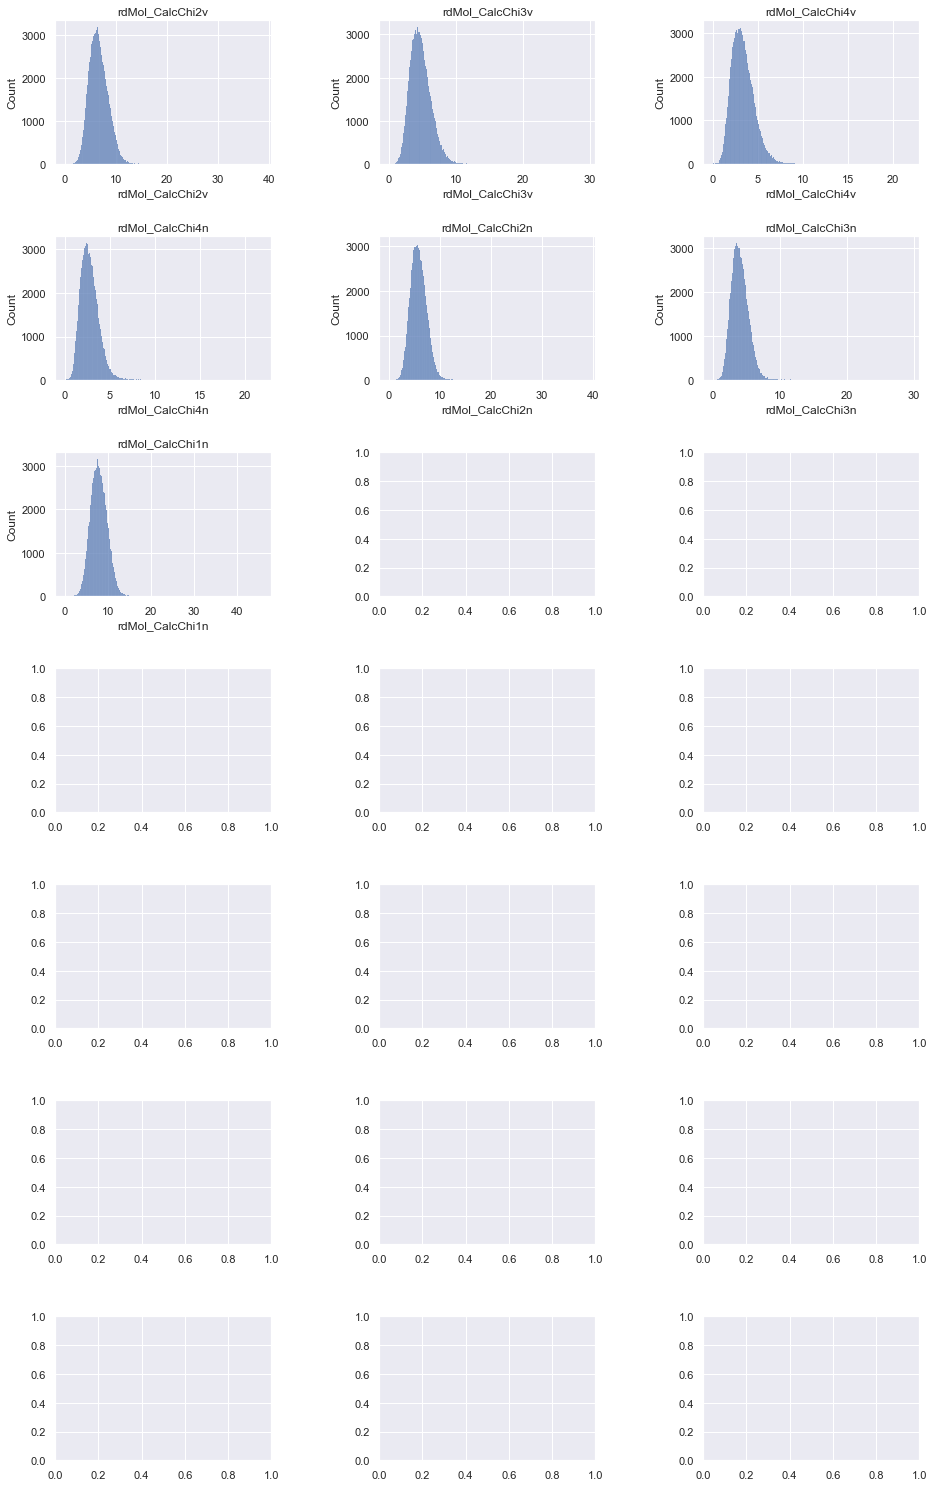

In [20]:
#Distributions of variables
fig, ax = plt.subplots(7,3, figsize=(10,4))
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=5, wspace=0.5, hspace=0.5)
for num,col in enumerate(features[:7]):
    plt.subplot(7,3,num+1)
    sns.histplot(x=df[col]);
    plt.title(col)

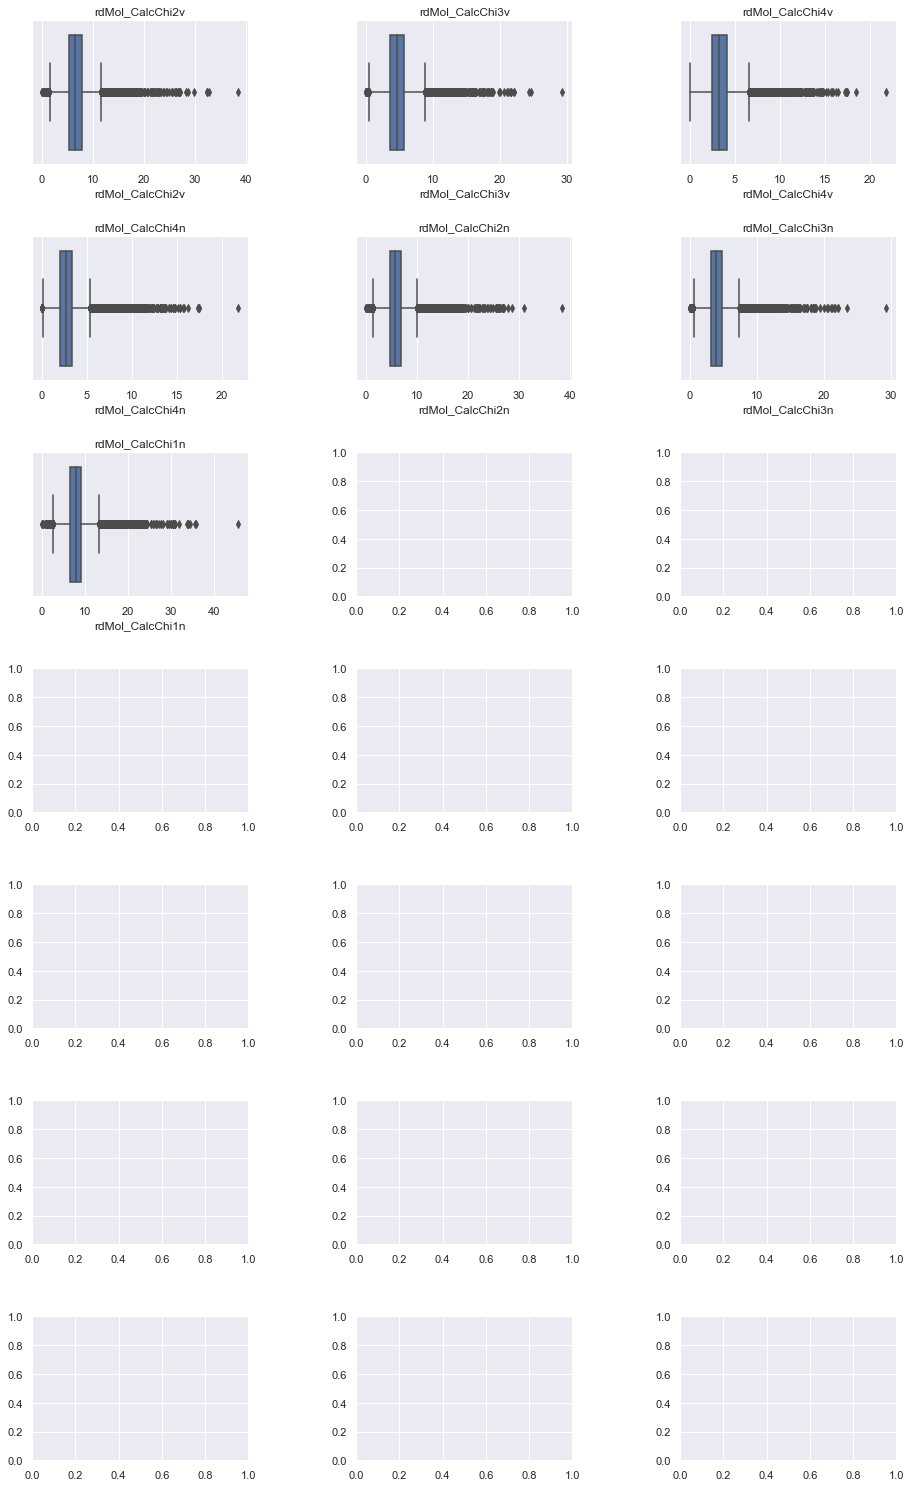

In [23]:
fig, ax = plt.subplots(7,3, figsize=(10,2))
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=10, wspace=0.5, hspace=0.5)
for num,col in enumerate(features[:7]):
    plt.subplot(7,3,num+1)
    sns.boxplot(x=df[col]);
    plt.title(col)

## PCA

In [25]:
from sklearn.preprocessing import StandardScaler
#Standardize data
column_names = df_num.columns
scaler = StandardScaler()
df_std = scaler.fit_transform(df_num)
df_std = pd.DataFrame(df_std,columns=column_names)

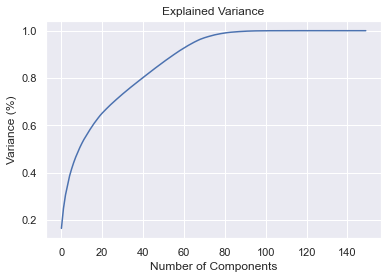

In [28]:
#You forgot to standadize the data!
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_std)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('Number of Components');
plt.ylabel('Variance (%)');
plt.title('Explained Variance');

## f1